In [102]:
cd C:\Users\Ginty\Desktop\EXTRACELLULAR\170403\fwdrev

C:\Users\Ginty\Desktop\EXTRACELLULAR\170403\fwdrev


In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py as h5py
import glob as glob
import numpy as np
import scipy.io

In [104]:
kwikfile = glob.glob('*.kwik')
if h5py.is_hdf5(kwikfile[0]):
    k = h5py.File(kwikfile[0],'r')
    clusters = k['/channel_groups/0/spikes/clusters/main'][:]
    time_samples = k['/channel_groups/0/spikes/time_samples'][:]


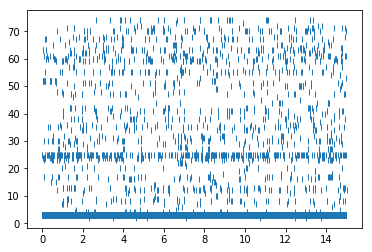

In [105]:
lsample = 0
rsample = 5000

plt.plot(np.linspace(0, len(time_samples[lsample:rsample])/(20000.0 / 60.0), num=len(time_samples[lsample:rsample])), clusters[lsample:rsample], '|')


In [174]:
stim = scipy.io.loadmat('stim.mat')

In [175]:
stim

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Apr 05 17:04:44 2017',
 '__version__': '1.0',
 'stimStart': array([[  5.97083333e-02],
        [  9.97083333e-02],
        [  1.39708333e-01],
        ..., 
        [  4.39939708e+02],
        [  4.39979708e+02],
        [  4.40019708e+02]]),
 'x1': array([[ 5035.57898229],
        [-5968.2109393 ],
        [ 2117.74793961],
        ..., 
        [ 3001.92549566],
        [-7804.28969624],
        [-6376.28138856]]),
 'y1': array([[ 6492.67099321],
        [ 6614.01369822],
        [-6439.35352001],
        ..., 
        [-5075.75671947],
        [-7546.55047355],
        [ 5488.9375981 ]])}

In [176]:
def plotPSTH(clusters, cluster_num, spike_times, stim_times):
    spikes = []
    for i,c in enumerate(clusters):
        if c == cluster_num:
            spike_delay = (spike_times[i] - stim_times[0]) % (stim_times[1] - stim_times[0])
            spikes.append(spike_delay)
    print (cluster_num)
    plt.plot(spikes,'o')

In [183]:
spike_latency = .005
spike_window = .03
plt.hold
def plotClusterRF(clusters, cluster_num, spike_times, x_laser, y_laser, stim_times):
    for i,c in enumerate(clusters):
        if c == cluster_num:
            spike_delay = (spike_times[i] - stim_times[0]) % (stim_times[1] - stim_times[0])
            if spike_delay < spike_window and spike_delay > spike_latency: 
                stim_index = int(np.round((spike_times[i] - stim_times[0]) / (stim_times[1] - stim_times[0])))
                if (stim_times[stim_index] - spike_times[i]) > 0:
                    plt.plot(x_laser[stim_index+1],y_laser[stim_index+1],'o')

In [184]:
spike_times = [s/20000.0 for s in time_samples] 

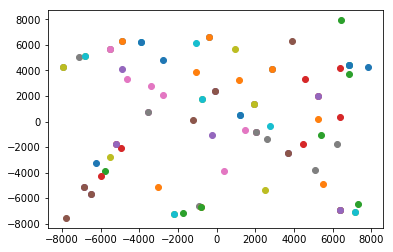

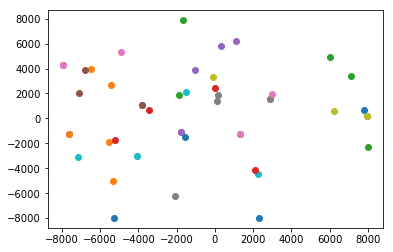

In [186]:
for c_num in great:
    plt.figure()
    plotClusterRF(clusters[0:120000], c_num, spike_times[0:120000], stim['x1'],stim['y1'], stim['stimStart'])

69
47


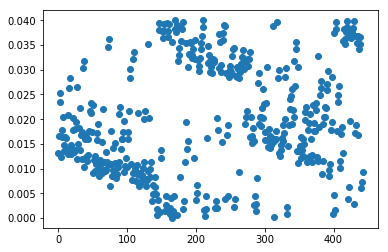

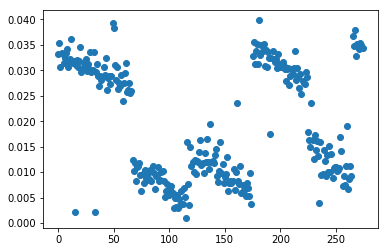

In [180]:
for c_num in great:
    plt.figure()
    plotPSTH(clusters[0:100000], c_num, spike_times, stim['stimStart'])

In [129]:
good =[13,16,19,20, 29,34, 36,38,42,47,48,51,57,59,62,69,71]
great = [69,47]

In [148]:
def clusterTimes(clusters, cluster_num, spike_times, x_laser, y_laser, stim_times):
    for i,c in enumerate(clusters):
        if c == cluster_num:
            spike_delay = (spike_times[i] - stim_times[0]) % (stim_times[1] - stim_times[0])
            if spike_delay < spike_window and spike_delay > spike_latency: 
                stim_index = int(np.round((spike_times[i] - stim_times[0]) / (stim_times[1] - stim_times[0])))
                if (stim_times[stim_index] - spike_times[i]) > 0 and (stim_times[stim_index] - spike_times[i]) < 1 :
                    plt.plot((stim_times[stim_index] - spike_times[i]), 'o')

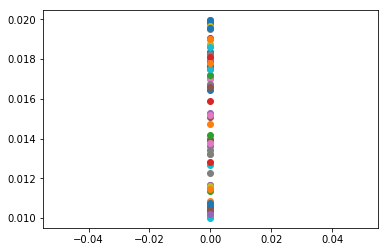

In [149]:
c_num = 69
clusterTimes(clusters[0:100000], c_num, spike_times[0:100000], stim['x1'],stim['y1'], stim['stimStart'])

In [172]:
spike_latency = .005
spike_window = .03
plt.hold
def plotClusterXY(clusters, cluster_num, spike_times, x_laser, y_laser, stim_times):
    for i,c in enumerate(clusters):
        if c == cluster_num:
            spike_delay = (spike_times[i] - stim_times[0]) % (stim_times[1] - stim_times[0])
            if spike_delay < spike_window and spike_delay > spike_latency: 
                stim_index = int(np.round((spike_times[i] - stim_times[0]) / (stim_times[1] - stim_times[0])))
                if (stim_times[stim_index] - spike_times[i]) > 0:
                    plt.plot(x_laser[stim_index:stim_index + 1],y_laser[stim_index:stim_index + 1],'o')

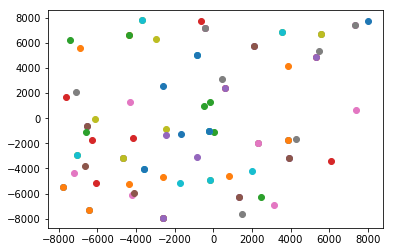

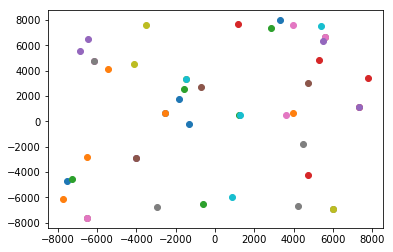

In [173]:
for c_num in great:
    plt.figure()
    plotClusterXY(clusters[0:120000], c_num, spike_times[0:120000], stim['x1'],stim['y1'], stim['stimStart'])